# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine Learning is great for finding patterns in large sets of data. In this case, predicting flight delays depends on many factors, like weather conditions, airport congestion, and past flight performance. It would be too hard for a person to figure this out just by looking at the data because there are so many different variables affecting it.
Based on the pst data, ML enables us to predict the outcome.

### 2. Formulate the business problem, success metrics, and desired ML output.

**Business Problem:** We want to help customers by predicting if their flight will be delayed. This way, they can plan better, like booking a different flight or adjusting their travel schedule.
**Success Metrics:** We measure the success of our prediction model by how accurate it is. For example, if the model predicts that a flight will be delayed, we want this prediction to be correct as often as possible.
**Desired ML Output:** The output from the ML model will be something like "1, the flight is delayed" or "0, the flight isn't be delayed." Alternatively, it might give a probability, like "There is a 70% chance of a delay."

### 3. Identify the type of ML problem you’re dealing with.

This is a classification problem (binary classification task) because we are trying to categorize flights into two class: "0" which means the flight is not delayed and "1" which means the flight is delayed. Our goal is to classify the elements into one of the two groups.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib import Path
from zipfile import ZipFile
import time
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = './data_compressed'
base_path = os.getcwd()
csv_base_path = './extracted_csv'


if not os.path.exists(csv_base_path):
    os.makedirs(csv_base_path)

In [3]:
# Print the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: d:\University\semester 3\datasci and tech\u3268702_baral_Assignment2


In [4]:
# How many zip files do we have? write a code to answer it.

#get a list of all files in the folder that end with '.zip'
zip_files = [file for file in os.listdir(zip_path) if file.endswith('.zip')]

#count the number of zip files
zip_file_count = len(zip_files)

#print the result
print(f"There are {zip_file_count} zip files in the '{zip_path}' folder.")

There are 60 zip files in the './data_compressed' folder.


#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    full_zip_path = os.path.join(zip_path, file) 
    zip2csv(full_zip_path, csv_base_path)

print("Files Extracted")

Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zi

In [6]:
# How many csv files have we extracted? write a code to answer it.

#get a list of all files in the folder that end with .csv
csv_files = [file for file in os.listdir(csv_base_path) if file.endswith('.csv')]

#count the number of csv files
csv_file_count = len(csv_files)

#print the result
print(f"There are {csv_file_count} csv files in the '{csv_base_path}' folder.")

There are 60 csv files in the './extracted_csv' folder.


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [7]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [8]:

file_path = os.path.join(csv_base_path, "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")
df_temp = pd.read_csv(file_path)

**Question**: Print the row and column length in the dataset, and print the column names.

In [9]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


The shape of the data tells us the total number of observations and features in the dataset. In the dataset that we took, has 585749 observations or entries and 110 features o columns.

**Question**: Print the first 10 rows of the dataset.  

In [10]:
#print first 10 observations
print(df_temp.head(10))

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [11]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [12]:
#list to store columns that have "del" in their name
columns_with_del = []

#loop through all column names
for col in df_temp.columns:
    if "del" in col.lower():  
        columns_with_del.append(col)

#print the columns that contain "del"
if columns_with_del:
    print(f"There are {len(columns_with_del)} columns and they are {columns_with_del}")
else:
    print("No columns contain 'del'.")



There are 14 columns and they are ['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [13]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0]," and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp.Year.unique()[0])
print("The months covered in this dataset are: ", df_temp.Month.unique()[0])
print("The date range for data is :" , min(df_temp.FlightDate), " to ", max(df_temp.FlightDate))
print("The airlines covered in this dataset are: ", list(df_temp.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(df_temp.Origin.unique()))
print("The Destination airports covered are: ", list(df_temp.Dest.unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  2018
The months covered in this dataset are:  9
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', '

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [14]:
counts = pd.DataFrame({'Origin': df_temp["Origin"].value_counts(), 'Destination':df_temp["Dest"].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [15]:
counts.sort_values(by=["Origin","Destination"],ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes, given the information about the flight trip data, we can predict it it will be delayed or not. By examining historical trends and how different features interact, we can gain valuable insights if the flight would be delayed or not.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [16]:
#cols is the list of columns to predict Arrival Delay 
filter_cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

In [17]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine CSV files into one DataFrame
    csv_files: list of CSV file names
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of values to subset rows
    file_name: name of the file to save the combined data
    """
    # Create an empty DataFrame
    df = pd.DataFrame()  # Initialize df

    # Loop through each file and process
    for file in csv_files:
        full_path = os.path.join(csv_base_path, file)  
        try:
            # Read the CSV file
            df_temp = pd.read_csv(full_path)
            df_temp = df_temp[filter_cols]  # Filter columns
            for col, val in zip(subset_cols, subset_vals):
                df_temp = df_temp[df_temp[col].isin(val)]  
            
            # Concatenate with the main DataFrame
            df = pd.concat([df, df_temp], axis=0)
        except FileNotFoundError:
            print(f"File not found: {full_path}")
        except Exception as e:
            print(f"Error reading {full_path}: {e}")

    # Save the combined DataFrame to a CSV file
    df.to_csv(file_name, index=False)
    print(f"Combined CSV file is stored at {file_name}")

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [18]:
start = time.time()

combined_csv_filename = os.path.join(base_path, "combined_files.csv")

combine_csv(csv_files,filter_cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Combined CSV file is stored at d:\University\semester 3\datasci and tech\u3268702_baral_Assignment2\combined_files.csv
csv's merged in 3.79 minutes


#### Load dataset

Load the combined dataset.

In [19]:
data = pd.read_csv("combined_files.csv")

In [20]:
data.shape

(1658130, 20)

Print the first 5 records.

In [21]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [22]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", data.Year.unique())
print("The months covered in this dataset are: ", data.Month.unique())
print("The date range for data is :" , min(data.FlightDate), " to ", max(data.FlightDate))
print("The airlines covered in this dataset are: ", list(data.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(data.Origin.unique()))
print("The Destination airports covered are: ", list(data.Dest.unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014 2015 2016 2017 2018]
The months covered in this dataset are:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [23]:
data.rename(columns={"ArrDel15":"is_delay"}, inplace=True) 

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [24]:
#chehc for the null values
data.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

We can see that four of out features has null values: ArrDelay, ArrDelayMinutes , is_delay and AirTime. And all the features has same number of null values which is 22540.           

In [25]:
#check the percentage of the missing value
data.isnull().sum()/data.shape[0]*100

Year                 0.000000
Quarter              0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
FlightDate           0.000000
Reporting_Airline    0.000000
Origin               0.000000
OriginState          0.000000
Dest                 0.000000
DestState            0.000000
CRSDepTime           0.000000
Cancelled            0.000000
Diverted             0.000000
Distance             0.000000
DistanceGroup        0.000000
ArrDelay             1.359363
ArrDelayMinutes      1.359363
is_delay             1.359363
AirTime              1.359363
dtype: float64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [26]:
### Remove null columns
data=data[~data.is_delay.isnull()]
data.isnull().sum(axis=0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64

Now after removing the observations with null values, we have a clean dataframe.

Get the hour of the day in 24-hour time format from CRSDepTime.

In [27]:
data['DepHourofDay'] = (data["CRSDepTime"]//100)

In [28]:
data["DepHourofDay"].head(3)

0    21
1     9
2    18
Name: DepHourofDay, dtype: int64

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

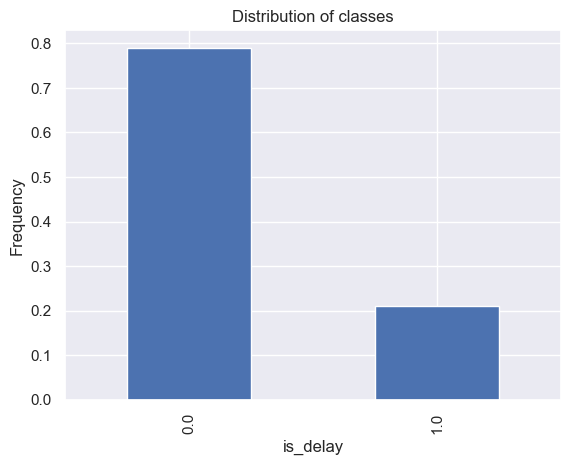

In [29]:
(data.groupby("is_delay").size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

The barplot visualizes the target varibale which is "is_delay". By looking at the plot, we can say that there are many instances where "is_delay" is 0 meaning the there was no delay compared to when "is_delay" which is 1 meaning there was delay.
This is a clear case of data imbalance which occurs when ine class appear more frequently than the othe one. This might impact the performance of the model which predicting the less frequent class (in our case that is delays).

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

Looking at the bar plot, we can see that in our dataset the ratio of flights without delays to flight with delays is quite large, which means that most of the flights didn't experienced delays or they were on time.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

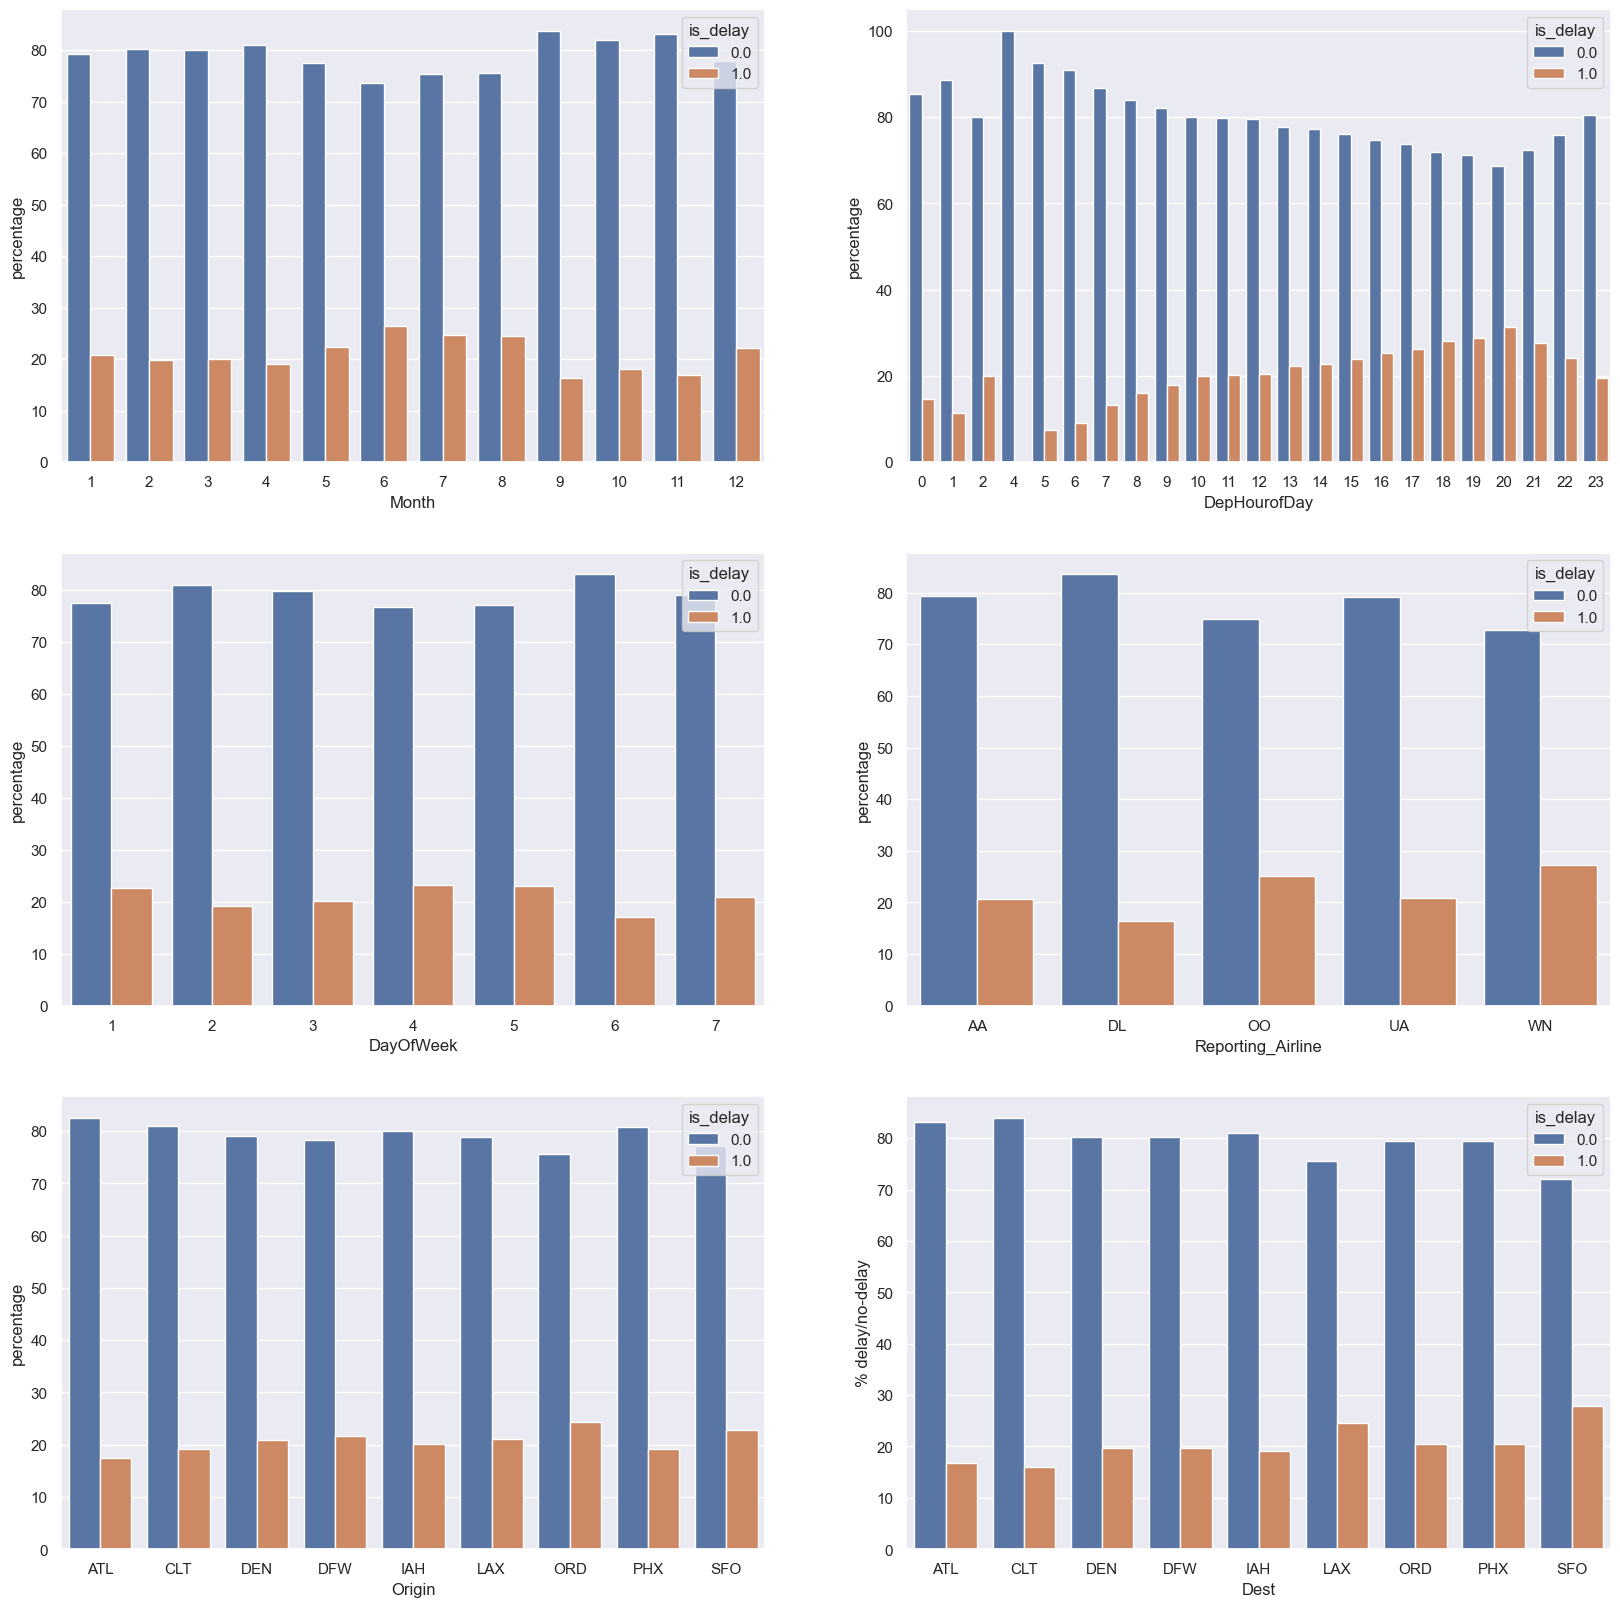

In [30]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

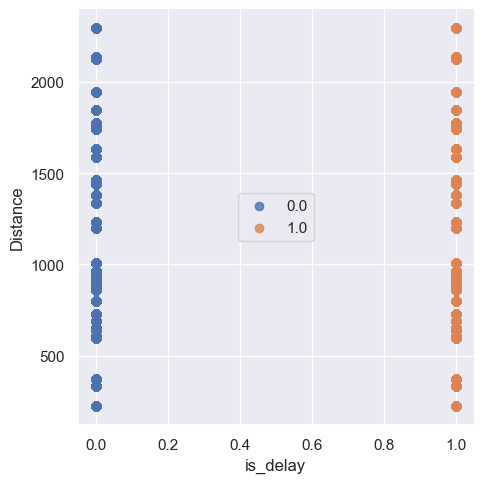

In [31]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown

**Key Insights from the above plots:**
- Delays are consistent across all months however may, june, july, august and decmebers have slightly more delays with june being the highest.

- The percentage of delay shows a increasing trend from 5:00 and peaks at approximately 8:00(20:00), which is the most delayed hour of the day and starts to decline untill 2:00 shows a signifiicant hike and surpringly, 4:00 doesnot show any delay at all.

- The dealy looks consistent across all days of the week but sunday, wednesday, thursday and saturday displays significant peaks with wednesday experiencing the most number of delays.

- WN, which is the IATA call sign for Southwest Airlines, is a major airline in the US that operates on a low-cost carrier model, is the airline that experienced the most number of delays, followed by SkyWest Airlines (oo).

- ATL (Hartsfield-Jackson Atlanta International Airport) and DEN (Denver International Airport) two of the busiest hubs in the US, stand out as the origin airports with the most delays. As for destination airports, SFO (San Francisco International Airport), known for its weather-related disruptions, and ORD (O'Hare International Airport), one of the busiest and most congested airports, experienced the most delays.

- From the scatter plot, it appears that flight distance does not have a clear, strong relationship with delays. The points representing flights with and without delays are spread across a similar range of distances, indicating that distance alone may not be a significant factor in determining whether a flight will be delayed. Both short and long flights experience delays, and both can be on time. So we can say that, flight distance does not seem to be a primary factor affecting delays, as delays are distributed fairly evenly across various distances.

### Features

Look at all the columns and what their specific types are.

In [32]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [33]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

In [34]:
data.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [35]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

In [36]:
# define the bins to split the hours of the day into different time intervals
bins = [0, 6, 12, 18, 24]

# specify the labels for each interval to categorize the hours
labels = ["Night", "Morning", "Afternoon", "Evening"]

# bucketize the 'DepHourofDay' column into the defined intervals using the labels
data["DepHourofDay"] = pd.cut(
    data["DepHourofDay"], bins=bins, labels=labels, right=False
)


In [37]:
data.dtypes

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [38]:
categorical_columns

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Reporting_Airline',
 'Origin',
 'Dest',
 'DepHourofDay']

In [39]:
data_dummies = pd.get_dummies(data[categorical_columns],drop_first=True)

In [40]:
# Concatenate the original data with the one-hot encoded columns
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [41]:
len(data)

1635590

In [42]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [43]:
#rename the column "is_delay" our target variable as "target"
data.rename(columns = {"is_delay":"target"}, inplace=True )

In [44]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

data.to_csv("combined_csv_v1.csv", index=False)

In [45]:
data.shape

(1635590, 75)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### deaclare ther target and predictor variables

In [46]:
X=data.drop(columns="target")
y=data["target"]

### Train test split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
#check the shape of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1308472, 74)
(327118, 74)
(1308472,)
(327118,)


### Baseline classification model

In [49]:
#building a logistic regression model as baseline model
baseline_model=LogisticRegression()


In [50]:
#Fit the model on the training set
baseline_model.fit(X_train, y_train)

LogisticRegression()

In [51]:
#predictions on the training set
y_train_pred = baseline_model.predict(X_train)

#predictions on the test set
y_test_pred = baseline_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Classification report for the training set
train_class_report = classification_report(y_train, y_train_pred, digits=4)
print("Training Classification Report:")
print(train_class_report)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report for the test set
test_class_report = classification_report(y_test, y_test_pred, digits=4)
print("Test Classification Report:")
print(test_class_report)


Training Accuracy: 0.7902
Training Classification Report:
              precision    recall  f1-score   support

         0.0     0.7903    0.9996    0.8827   1033837
         1.0     0.5449    0.0017    0.0034    274635

    accuracy                         0.7902   1308472
   macro avg     0.6676    0.5007    0.4431   1308472
weighted avg     0.7388    0.7902    0.6982   1308472

Test Accuracy: 0.7900
Test Classification Report:
              precision    recall  f1-score   support

         0.0     0.7902    0.9996    0.8827    258421
         1.0     0.5367    0.0017    0.0034     68697

    accuracy                         0.7900    327118
   macro avg     0.6635    0.5007    0.4430    327118
weighted avg     0.7370    0.7900    0.6980    327118



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [53]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    
    # plot the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    

In [54]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    
    # calculate the area under the curve 
    auc = metrics.roc_auc_score(test_labels, target_predicted)
    
    # plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

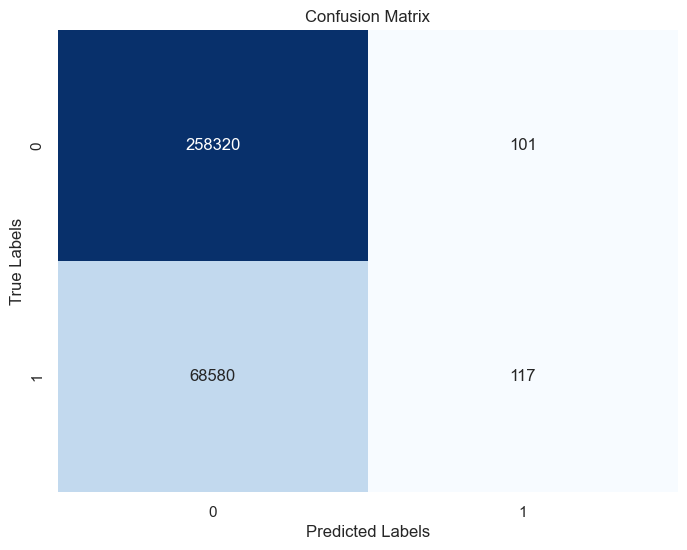

In [55]:
#call the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_test_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

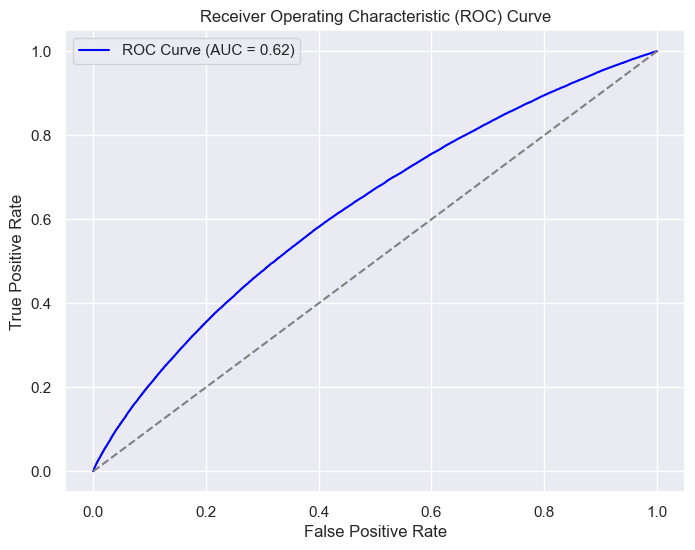

In [56]:
#use the probabilities of the positive class (1)
y_test_prob = baseline_model.predict_proba(X_test)[:, 1]

#call the plot_roc function with the true labels and the predicted probabilities
plot_roc(y_test, y_test_prob)

From the ROC Cureve we interpret:

- The curve has an AUC of 0.64, which is better than a random classifier (AUC = 0.5) but still not very strong. 
- The curve is not a straight line from the origin to the top right corner, indicating that the model has some ability to distinguish between classes but is not performing well. 
- ROC curves closer to the top left corner (0.0, 1.0) would indicate better performance. In this case, since the curve is not very close to that area, the model’s performance is only moderate. 
- The model needs improvement to reach higher performance levels, as the current curve shows it is not highly effective in distinguishing between delayed and non-delayed cases.

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


- The model correctly predicted 258,276 cases where there was no delay (true negatives). 
- It wrongly predicted 145 cases as delayed when there was no delay (false positives). 
- The model missed 68,489 cases of actual delays, predicting them as no delay (false negatives). 
- It only correctly identified 208 cases where there was a delay (true positives), indicating poor performance in detecting delays.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://github.com/baralrohit/AWS-Sagemaker-Project.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [57]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [58]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

#first convert the "flightdata" column to a datetime format
data_orig['FlightDate']=pd.to_datetime(data_orig["FlightDate"])

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in holidays else 0)

print(data_orig.head())


   Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate Reporting_Airline  \
0  2014        1      1          26          7 2014-01-26                DL   
1  2014        1      1          26          7 2014-01-26                DL   
2  2014        1      1          26          7 2014-01-26                DL   
3  2014        1      1          26          7 2014-01-26                DL   
4  2014        1      1          26          7 2014-01-26                DL   

  Origin OriginState Dest  ... Cancelled  Diverted  Distance  DistanceGroup  \
0    ATL          GA  IAH  ...       0.0       0.0     689.0              3   
1    DFW          TX  ATL  ...       0.0       0.0     731.0              3   
2    ATL          GA  DEN  ...       0.0       0.0    1199.0              5   
3    ATL          GA  PHX  ...       0.0       0.0    1587.0              7   
4    PHX          AZ  ATL  ...       0.0       0.0    1587.0              7   

   ArrDelay  ArrDelayMinutes  is_delay  AirTime  D

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [59]:
weather = pd.read_csv("data/daily-summaries-2024-10-31T19-16-28.csv") 
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [60]:
weather['MONTH'] = weather["DATE"].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [61]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [62]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather.TAVG.isna()] 
TMAX_idx = idx[weather.TMAX.isna()]
TMIN_idx = idx[weather.TMIN.isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [63]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [64]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [65]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [66]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [67]:
#convert FlightDate in data_orig to datetime
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

#convert DATE in weather to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [68]:
print(data_orig['FlightDate'].dtype)
print(weather['DATE'].dtype)

datetime64[ns]
datetime64[ns]


In [69]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [70]:
sum(data.isna().any())

0

In [71]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [72]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [73]:
data["is_holiday"].nunique()

2

In [74]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [75]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [76]:
data.rename(columns = {"is_delay": "target"}, inplace=True )

In [77]:
data.to_csv("combined_csv_v2.csv", index=False)

In [78]:
data.shape

(1635590, 86)

Create the training and testing sets again.

In [79]:
X=data.drop(columns="target")
y=data["target"]

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [81]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression()
classifier2.fit(X_train,y_train)


LogisticRegression()

In [82]:
# Predictions on the training set
y_train_pred_classifier2 = classifier2.predict(X_train)

# Predictions on the test set
y_test_pred_classifier2 = classifier2.predict(X_test)

In [83]:
# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred_classifier2)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Classification report for the training set
train_class_report = classification_report(y_train, y_train_pred_classifier2, digits=4)
print("Training Classification Report:")
print(train_class_report)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_classifier2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report for the test set
test_class_report = classification_report(y_test, y_test_pred_classifier2, digits=4)
print("Test Classification Report:")
print(test_class_report)

Training Accuracy: 0.7897
Training Classification Report:
              precision    recall  f1-score   support

         0.0     0.7951    0.9887    0.8814   1033837
         1.0     0.4887    0.0408    0.0753    274635

    accuracy                         0.7897   1308472
   macro avg     0.6419    0.5147    0.4783   1308472
weighted avg     0.7308    0.7897    0.7122   1308472

Test Accuracy: 0.7895
Test Classification Report:
              precision    recall  f1-score   support

         0.0     0.7947    0.9890    0.8813    258421
         1.0     0.4857    0.0392    0.0725     68697

    accuracy                         0.7895    327118
   macro avg     0.6402    0.5141    0.4769    327118
weighted avg     0.7298    0.7895    0.7114    327118



Perform the evaluaion as you have done with the previous model and plot/show the same metrics

In [84]:
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    
    # plot the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [85]:
def plot_roc(test_labels, target_predicted):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    
    # calculate the area under the curve 
    auc = metrics.roc_auc_score(test_labels, target_predicted)
    
    # plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

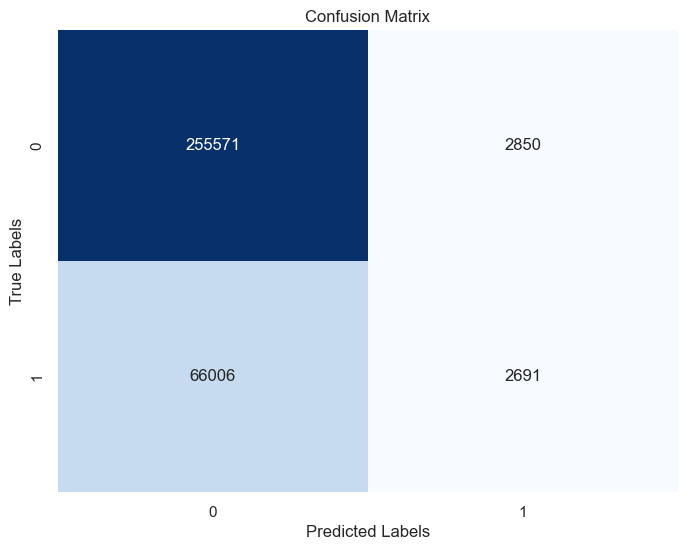

In [86]:
plot_confusion_matrix(y_test, y_test_pred_classifier2)


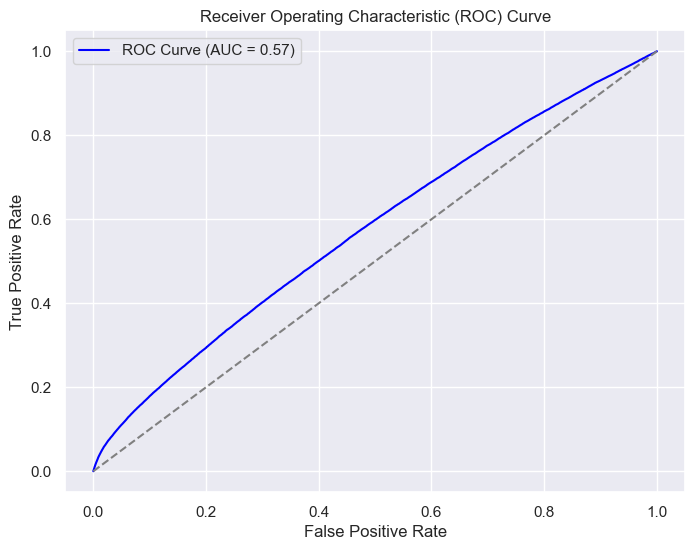

In [87]:
#use the probabilities of the positive class (1)
y_test_prob_classifier2 = classifier2.predict_proba(X_test)[:, 1]

#call the function
plot_roc(y_test, y_test_prob_classifier2)

- The curve has an AUC of 0.57, which is only slightly better than a random classifier (AUC = 0.5), indicating that the model's performance is poor. 
- The curve is not very close to the top left corner (0.0, 1.0), which would represent good performance. Instead, it is relatively close to the diagonal line, suggesting the model is only slightly better than random guessing. 
- ROC curves closer to the top left corner indicate better performance levels, but since this curve is not close to that area, the model does not distinguish well between the two classes. 
- The model needs significant improvement to become a reliable classifier for the given task.

Question: did you notice a difference by adding the extra data on the results?

Differences between the Baseline model and classifier2 model:

- The overall accuracy of both models is almost the same. The first model has an accuracy of 0.7902, and the second model has 0.7895. Adding more data didn’t change the accuracy much.
- Both models are very good at predicting flights with no delay because there are more of these cases in the data. The second model made a small improvement in handling this class but not by much.
- The second model did slightly better at finding delays, the recall (how well the model finds actual delays) went up a bit, from 0.0030 to 0.0408 in training and from 0.0030 to 0.0392 in testing. This means the second model caught a few more delay cases. 
- here’s a small improvement in the model’s ability to balance predictions between delayed and non-delayed flights, but it still favors the non-delayed flights heavily.

### Hyperparameter tuning

I experimented with tuning the hyperparameters of the Logistic Regression model to see if we could boost its performance. Specifically, we used GridSearchCV to find the best settings for two key parameters.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#initialize the logistic regression model
classifier_logistic_3 = LogisticRegression(solver='liblinear', random_state=42)

#hyperparameter grid to try different values
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  #inverse of regularization strength
    'penalty': ['l1', 'l2']  #regularization type
}

#use grid search to find the best hyperparameters
grid_search_logistic = GridSearchCV(estimator=classifier_logistic_3, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

#fit the grid search to the training data
grid_search_logistic.fit(X_train, y_train)

#get the best model with tuned hyperparameters
best_classifier_logistic = grid_search_logistic.best_estimator_

#print the best hyperparameters
print("Best Hyperparameters:", grid_search_logistic.best_params_)

#make predictions on the training and test sets with the tuned model
y_train_pred = best_classifier_logistic.predict(X_train)
y_test_pred = best_classifier_logistic.predict(X_test)

#evaluate the performance of the tuned model
from sklearn.metrics import accuracy_score, classification_report

#calculate and print training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

#classification report for the training set
train_class_report = classification_report(y_train, y_train_pred, digits=4)
print("Training Classification Report:")
print(train_class_report)

#calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

#classification report for the test set
test_class_report = classification_report(y_test, y_test_pred, digits=4)
print("Test Classification Report:")
print(test_class_report)


Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Training Accuracy: 0.7930
Training Classification Report:
              precision    recall  f1-score   support

         0.0     0.7977    0.9887    0.8830   1033837
         1.0     0.5691    0.0562    0.1023    274635

    accuracy                         0.7930   1308472
   macro avg     0.6834    0.5224    0.4926   1308472
weighted avg     0.7497    0.7930    0.7191   1308472

Test Accuracy: 0.7926
Test Classification Report:
              precision    recall  f1-score   support

         0.0     0.7973    0.9889    0.8828    258421
         1.0     0.5650    0.0543    0.0990     68697

    accuracy                         0.7926    327118
   macro avg     0.6811    0.5216    0.4909    327118
weighted avg     0.7485    0.7926    0.7182    327118



Our initial Logistic Regression model wasn't performing well, especially in identifying delayed flights (Class 1). We tuned the hyperparameters to give the model a better chance to learn patterns in the data and improve its predictions, particularly for the minority class.
- The best hyperparameters found were C = 100 and penalty = 'l1', which means the model used less regularization and l1 regularization. 
- The Training Accuracy improved slightly to 79.30%, and the Test Accuracy was 79.26%. However, the model still struggles with identifying delays: The recall for delayed flights (Class 1) is only 5.62% on the training set and 5.43% on the test set, meaning the model still misses most of the actual delays. 
- The precision for delayed flights improved a bit, but the overall f1-score remains low for this class, indicating that our model's ability to detect delays is still weak.

Tuning the Logistic Regression model helped a little, but it didn't solve the problem of class imbalance. The model is still much better at predicting non-delayed flights (Class 0) and struggles significantly with delayed ones (Class 1).

### random forrest

I decided to use an ensemble technique because it often performs better than single models. Ensemble methods, like Random Forest, combine multiple decision trees to make more accurate and stable predictions. They are good at capturing complex patterns in data and can handle imbalances more effectively compared to simpler models like Logistic Regression. Given our problem of predicting flight delays, we wanted to see if this approach would help improve the model’s performance, especially in detecting the minority class (delays).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#initialize the random forest classifier
classifier_rf = RandomForestClassifier(random_state=42)

#fit the model to the training data
classifier_rf.fit(X_train, y_train)

#make predictions on the training and test sets
y_train_pred_rf = classifier_rf.predict(X_train)
y_test_pred_rf = classifier_rf.predict(X_test)

#calculate and print training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy: {train_accuracy:.4f}")

#classification report for the training set
train_class_report = classification_report(y_train, y_train_pred_rf, digits=4)
print("Training Classification Report:")
print(train_class_report)

#calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy: {test_accuracy:.4f}")

#classification report for the test set
test_class_report = classification_report(y_test, y_test_pred_rf, digits=4)
print("Test Classification Report:")
print(test_class_report)


Result:

- The Training Accuracy was extremely high at 99.56%, which suggests that the model learned the training data very well. However, this also indicates possible overfitting, meaning the model might be too specialized to the training data and may not generalize well to new data.
- The Test Accuracy dropped to 79.55%, which is similar to the accuracy we saw with Logistic Regression. However, the performance on predicting delayed flights (Class 1) improved slightly. The precision for delayed flights (Class 1) was 51.92%, meaning the model was somewhat better at correctly identifying flights that were actually delayed. 
- The recall for delayed flights was still low at 35.62%, so the model missed many actual delays. Overall, the f1-score for delayed flights (Class 1) was 42.25%, indicating a moderate improvement over previous models, but still far from ideal.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
https://public.tableau.com/app/profile/rohit.baral/viz/u3268702_dsts/Dashboard1?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
- The model's performance doesn't fully meet the business goal. While it has a decent accuracy of around 79%, it still struggles to correctly predict delayed flights, especially because of the class imbalance. If I had more time, I would try tuning the model further by adjusting key hyperparameters, such as: 
    - Regularization Strength: In models like logistic regression, tweaking the regularization parameter (e.g., C) could help find a better balance between overfitting and underfitting, improving generalization. 
    - Learning Rate: For models like gradient boosting, adjusting the learning rate could stabilize and improve model performance over more iterations. 
    - Number of Trees: In ensemble models like Random Forest or Gradient Boosting, increasing the number of trees can make the model more robust, though it may also increase computation time. 
    - Class Weights: Setting class_weight='balanced' in algorithms like Logistic Regression or using a custom weighting scheme could help the model pay more attention to the minority class (delays), making it better at detecting these cases.

 Additionally, I might experiment with different algorithms like XGBoost or Balanced Random Forest, which are often more effective with imbalanced datasets. I could also focus on feature engineering, such as adding more detailed weather information, flight schedules, or even historical delays at specific airports. This could help the model better understand and predict the conditions leading to delays.

2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
- The data that we added gave slight improvement, especially in identifying delayed flights, but the gains were modest. The model still struggled with accurately predicting delays due to the significant class imbalance. Throughout the project, I tried techniques like data cleaning, imputation, and tuning the hyperparamters.

3. What were some of the biggest challenges you encountered throughout this project?
- A significant challenge was dealing with the class imbalance, where the number of non-delayed flights far outweighed the delayed ones, making it difficult for the model to predict delays accurately. 
- Handling the large size of the dataset was another challenge. It increased processing time, making it tough to run and evaluate different models efficiently. 
- Lastly, understanding which features had low predictive power and deciding whether to keep or remove them required careful analysis and added complexity.

4. What were the three most important things you learned about machine learning while completing this project?
- First, I learned how crucial it is to address class imbalance. An imbalanced dataset can significantly affect model performance, especially for the minority class.
- Second, I realized the power of ensemble methods like Random Forest in handling complex patterns and improving predictions. 
- Third, I understood the importance of feature engineering. Creating and selecting the right features can have a big impact on model performance.